# Рубежный контроль №1
Выполнил: Аимань Мухэяти  
Группа: ИУ5И-23М  
Вариант 16

# Задача №1  
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation)

Подключим необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

Возьмём набор данных:

In [2]:
house=pd.read_csv('house.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


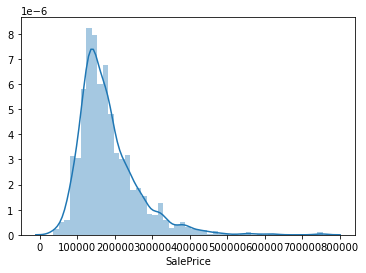

In [3]:
sns.distplot(house['SalePrice'])

Регрессионная модель, полученная с использованием преобразованных данных Бокса-Кокса, лучше, чем модель до преобразования, преобразование может сделать силу интерпретации модели и другие характеристики более превосходными

Skewness of SalePrice:1.8828757597682129
Kurtosis of SalePrice:6.536281860064529


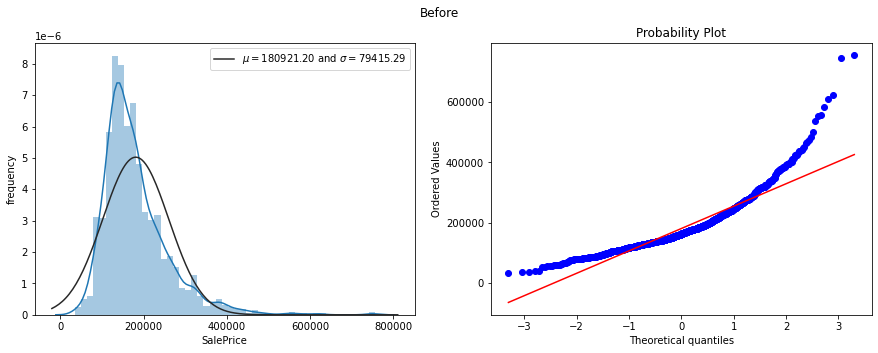

In [5]:
fig=plt.figure(figsize=(15,5))
#pic1
plt.subplot(1,2,1)
sns.distplot(house['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(house['SalePrice'])
plt.legend(['$\mu=${:.2f} and $\sigma=${:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
#pic2
plt.subplot(1,2,2)
res=stats.probplot(house['SalePrice'],plot=plt)
plt.suptitle('Before')
print(f"Skewness of SalePrice:{house['SalePrice'].skew()}")
print(f"Kurtosis of SalePrice:{house['SalePrice'].kurt()}")

In [6]:
#Box-Cox
house.SalePrice,lambda_=stats.boxcox(house.SalePrice)
print(lambda_)

-0.07692391328663316


Skewness of SalePrice:-0.008652893640830044
Kurtosis of SalePrice:0.8778702059824472


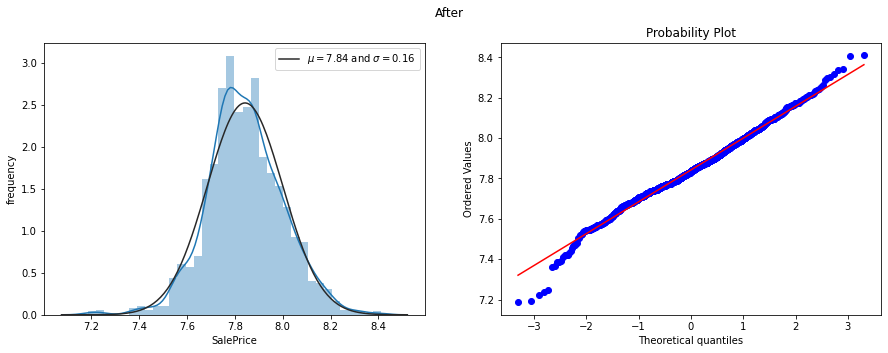

In [7]:
#Посмотрим еще раз на цены на жилье
fig=plt.figure(figsize=(15,5))
#pic1
plt.subplot(1,2,1)
sns.distplot(house['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(house['SalePrice'])
plt.legend(['$\mu=${:.2f} and $\sigma=${:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
#pic2
plt.subplot(1,2,2)
res=stats.probplot(house['SalePrice'],plot=plt)
plt.suptitle('After')
print(f"Skewness of SalePrice:{house['SalePrice'].skew()}")
print(f"Kurtosis of SalePrice:{house['SalePrice'].kurt()}")


Видно, что преобразованные данные лучше соответствуют предположениям о нормальности.Это, вероятно, принесет лучшие результаты в изучении моделей ML.

Дополнительные:

Text(0.5, 1.0, 'Box-Plot')

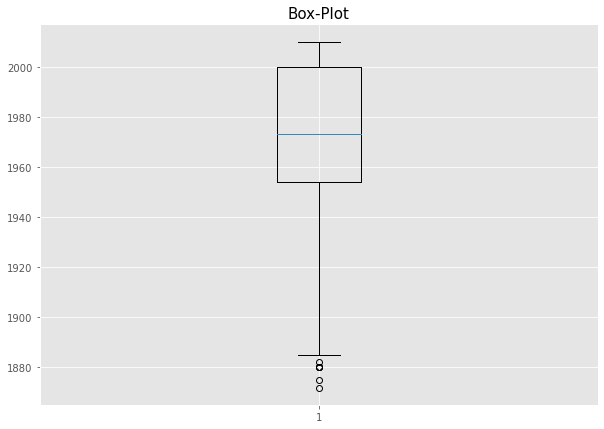

In [8]:
%matplotlib inline
plt.style.use("ggplot")
fig,ax=plt.subplots(figsize=(10,7))
ax.boxplot(house.YearBuilt)
ax.set_title("Box-Plot",fontsize=15)

# Задача №2
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации


Разделим набор данных на Х и y:

In [9]:
X=house.drop(['SalePrice','Id'], axis = 1)._get_numeric_data()
y=house.SalePrice

In [10]:
X.shape

(1460, 36)

In [11]:
X.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

используем среднее значение вместо нулевого значения

In [13]:
import sklearn.impute
import sklearn.preprocessing

In [14]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_LotFrontage = mean_imp.fit_transform(X[["LotFrontage"]])
mean_GarageYrBlt = mean_imp.fit_transform(X[["GarageYrBlt"]])
mean_MasVnrArea = mean_imp.fit_transform(X[["MasVnrArea"]])
X["LotFrontage"] = mean_LotFrontage
X["GarageYrBlt"] = mean_GarageYrBlt
X["MasVnrArea"] = mean_MasVnrArea
X.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Отбор признаков с помощью класса SelectKBest и метода "mutual_info_regression"

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector=SelectKBest(mutual_info_regression,k=5)
selector.fit(X,y)
X_selected=selector.transform(X)
X_selected.shape

(1460, 5)

Просмотр выбранных имен столбцов

In [16]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2

In [17]:
X.columns[selector.get_support(indices=True)].tolist()

['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']